In [209]:
# Data Set for Heart Disease

In [227]:
library(tidyverse)
library(repr)
library(rvest)
library(scales)
library(tidymodels)
library(cowplot)
library(ggplot2)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [228]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- as_tibble(read.table(url, sep = ",", header = FALSE, na.strings = "?"))

# display the data
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


In [229]:
# add column names
colnames(heart_data) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate", "exercise_induced_angina", "depression", "peak_exercise", "number_vessels", "normality", "heart_disease_diagnosis")

head(heart_data)

age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,depression,peak_exercise,number_vessels,normality,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [230]:
# clean the data

# only keep select columns
heart_data <- heart_data |>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, depression, heart_disease_diagnosis)

heart_data <- heart_data |>
    mutate(heart_disease_diagnosis = case_when(heart_disease_diagnosis == 0 ~ "negative",
                                heart_disease_diagnosis == 1 ~ "positive",
                                heart_disease_diagnosis == 2 ~ "positive",
                                heart_disease_diagnosis == 3 ~ "positive",
                                heart_disease_diagnosis == 4 ~ "positive"))
heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
67,160,286,108,1.5,positive
67,120,229,129,2.6,positive
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,positive
57,130,236,174,0.0,positive
38,138,175,173,0.0,negative


Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [231]:
# split into testing and training data
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease_diagnosis)
heart_data_training_set <- training(heart_data_split)
heart_data_testing_set <- testing(heart_data_split)

In [232]:
# number of observations in each class for prediction variables
diagnoses_distributions <- heart_data_training_set |>
    group_by(heart_disease_diagnosis) |>
    summarize(count = n())

diagnoses_distributions

heart_disease_diagnosis,count
<chr>,<int>
negative,123
positive,104


In [233]:
# count rows with missing data
missing_data <- sum(is.na(heart_data_training_set $ age)) |>
    sum(is.na(heart_data_training_set $ resting_blood_pressure)) |>
    sum(is.na(heart_data_training_set $ cholesterol)) |>
    sum(is.na(heart_data_training_set $ max_heart_rate)) |>
    sum(is.na(heart_data_training_set $ depression)) |>
    sum(is.na(heart_data_training_set $ heart_disease_diagnosis))

missing_data

[1] 0

In [234]:
# find the mean of each variable used for predictions
heart_data_mean_values <- heart_data_training_set |>
    summarize(across(age:depression, mean))

heart_data_mean_values

age,resting_blood_pressure,cholesterol,max_heart_rate,depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.42291,131.489,246.207,149.1233,1.038326


Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [257]:
age_vs_diagnosis_plot <- heart_data_training_set |>
    filter(heart_disease_diagnosis == "positive") |>
    group_by(age) |>
    summarize(count = n()) |>
    ggplot(aes(x = age, y = count)) +
    geom_line(color = "red") +
    labs(x = "Age (Years)", y = "Number of Positive Diagnoses") + 
    theme(text = element_text(size = 15))

In [258]:
resting_blood_pressure_vs_diagnosis_plot <- heart_data_training_set |>
    filter(heart_disease_diagnosis == "positive") |>
    group_by(resting_blood_pressure) |>
    summarize(count = n()) |>
    ggplot(aes(x = resting_blood_pressure, y = count)) +
    geom_line(color = "red") +
    labs(x = "Resting Blood Pressure (mm Hg)", y = "Number of Positive Diagnoses") + 
    theme(text = element_text(size = 15))

In [259]:
cholesterol_vs_diagnosis_plot <- heart_data_training_set |>
    filter(heart_disease_diagnosis == "positive") |>
    group_by(cholesterol) |>
    summarize(count = n()) |>
    ggplot(aes(x = cholesterol, y = count)) +
    geom_line(color = "red") +
    labs(x = "Serum Cholesterol (mg/dl)", y = "Number of Positive Diagnoses") + 
    theme(text = element_text(size = 15))

In [260]:
max_heart_rate_vs_diagnosis_plot <- heart_data_training_set |>
    filter(heart_disease_diagnosis == "positive") |>
    group_by(max_heart_rate) |>
    summarize(count = n()) |>
    ggplot(aes(x = max_heart_rate, y = count)) +
    geom_line(color = "red") +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Number of Positive Diagnoses") + 
    theme(text = element_text(size = 15))

In [261]:
depression_vs_diagnosis_plot <- heart_data_training_set |>
    filter(heart_disease_diagnosis == "positive") |>
    group_by(depression) |>
    summarize(count = n()) |>
    ggplot(aes(x = depression, y = count)) +
    geom_line(color = "red") +
    labs(x = "Depression Induced by Exercise Relative to Rest", y = "Number of Positive Diagnoses") + 
    theme(text = element_text(size = 15))

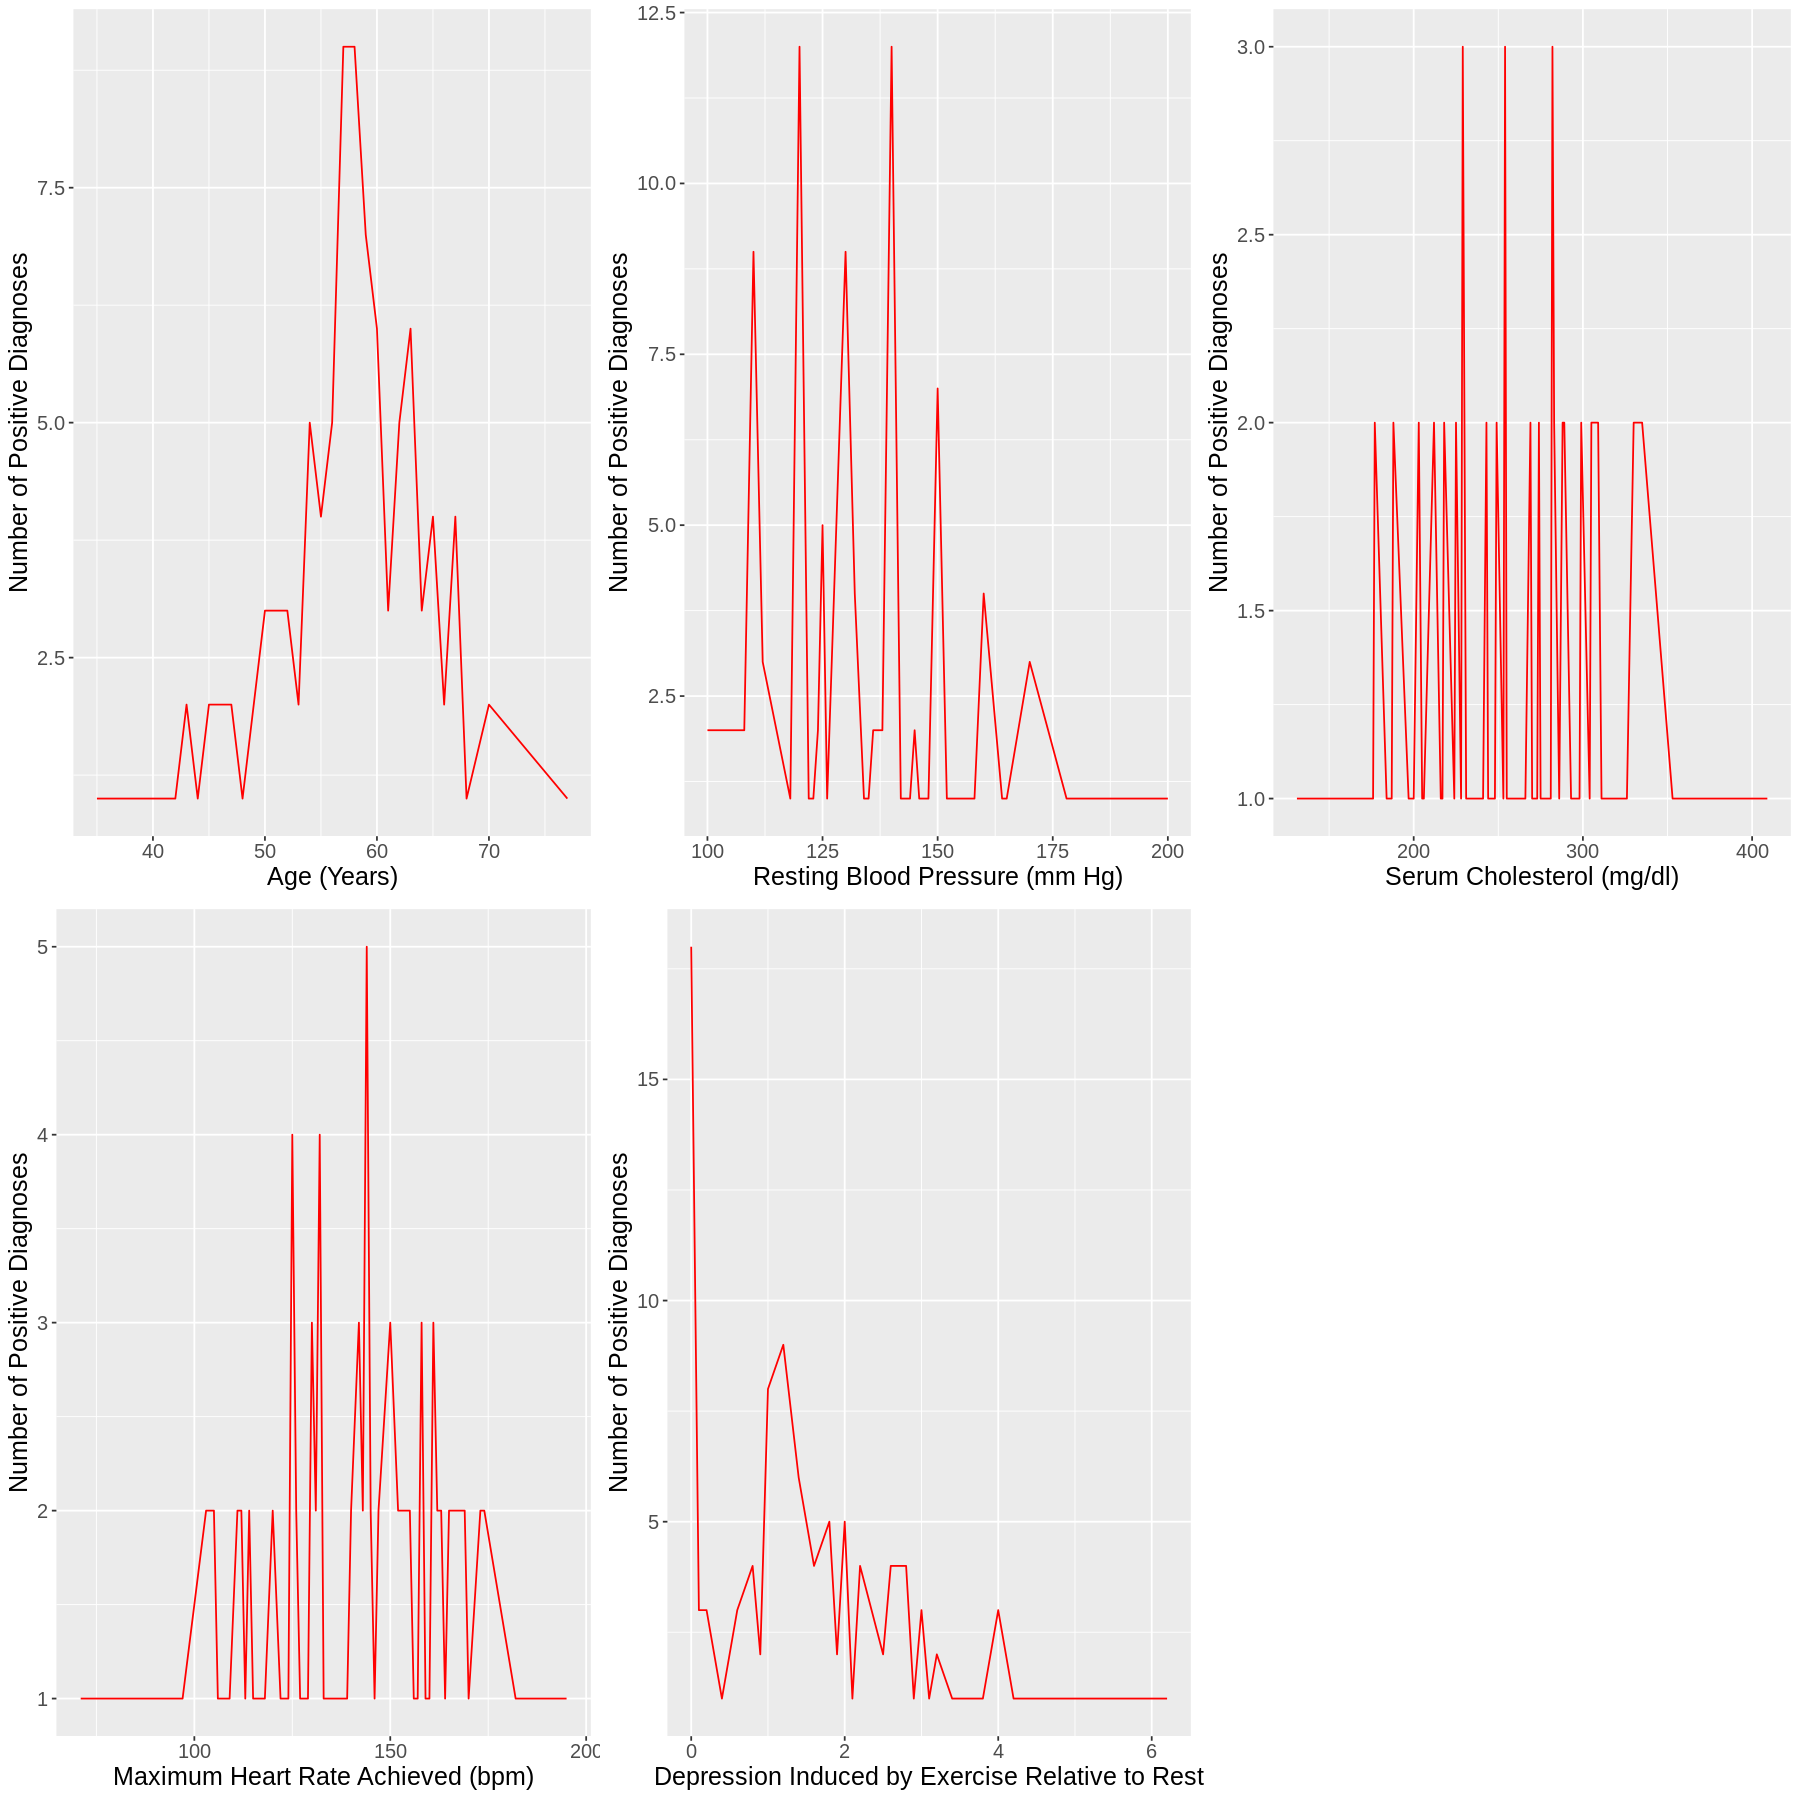

In [262]:
# display all the graphs at once

options(repr.plot.width = 15, repr.plot.height = 15)

display_plots <- plot_grid(age_vs_diagnosis_plot, 
                           resting_blood_pressure_vs_diagnosis_plot, 
                           cholesterol_vs_diagnosis_plot, 
                           max_heart_rate_vs_diagnosis_plot, 
                           depression_vs_diagnosis_plot) 

display_plots